In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns


import numpy as np 
import pandas as pd

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

from textblob import TextBlob

from langdetect import detect
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

import os
from PIL import Image

#NLP
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
import re
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()

#WordCloud
from wordcloud import WordCloud,STOPWORDS

#Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

#Machine learning
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [2]:
df = pd.read_csv("Coronavirus tweets NLP - Text Classification.csv")
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [3]:
X = df['OriginalTweet'].copy()
y = df['Sentiment'].copy()

In [4]:
df["OriginalTweet"]=df["OriginalTweet"].str.lower()
df["OriginalTweet"]=df["OriginalTweet"].str.replace("[^\w\s]","")
df["OriginalTweet"]=df["OriginalTweet"].str.replace("\d+","")
df["OriginalTweet"]=df["OriginalTweet"].str.replace("\n"," ").replace("\r","")

In [5]:
df.Sentiment.value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

In [6]:
df["Stars"] = df["Sentiment"].map({"Extremely Negative":1,"Negative":2,"Neutral":3,"Positive":4,"Extremely Positive":5})

In [7]:
df['year'] = pd.DatetimeIndex(df['TweetAt']).year
df['month'] = pd.DatetimeIndex(df['TweetAt']).month
df['day'] = pd.DatetimeIndex(df['TweetAt']).day

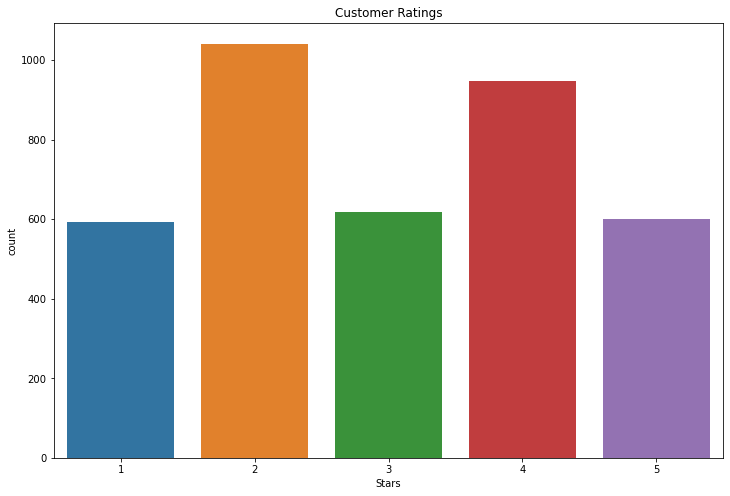

In [8]:
plt.figure(figsize=(12,8))
plt.title("Customer Ratings")
sns.countplot(df.Stars);

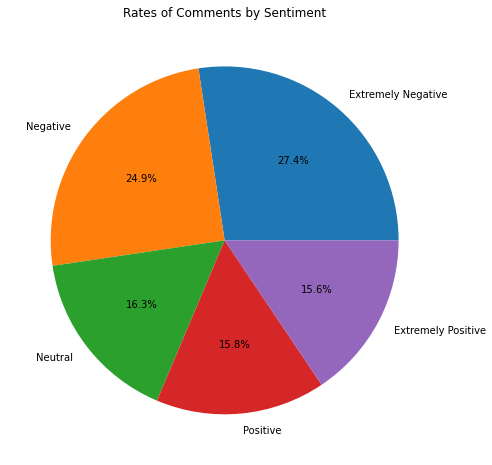

In [9]:
plt.figure(figsize=(10,8))
plt.title("Rates of Comments by Sentiment")
plt.pie(df.Sentiment.value_counts(),autopct='%1.1f%%',labels = ["Extremely Negative","Negative","Neutral","Positive","Extremely Positive"]);

In [10]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'Stars', 'year', 'month', 'day'],
      dtype='object')

In [11]:
df = df[['Location','OriginalTweet','Sentiment','Stars', 'year']]
df

,Location,OriginalTweet,Sentiment,Stars,year
0,NYC,trending new yorkers encounter empty supermark...,Extremely Negative,1,2020
1,"Seattle, WA",when i couldnt find hand sanitizer at fred mey...,Positive,4,2020
2,NaN,find out how you can protect yourself and love...,Extremely Positive,5,2020
3,Chicagoland,panic buying hits newyork city as anxious shop...,Negative,2,2020
4,"Melbourne, Victoria",toiletpaper dunnypaper coronavirus coronavirus...,Neutral,3,2020
...,...,...,...,...,...
3793,Israel ??,meanwhile in a supermarket in israel people d...,Positive,4,2020
3794,"Farmington, NM",did you panic buy a lot of nonperishable items...,Negative,2,2020
3795,"Haverford, PA",asst prof of economics cconces was on nbcphila...,Neutral,3,2020
3796,NaN,gov need to do somethings instead of biar je r...,Extremely Negative,1,2020


## WorldCloud

In [12]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=25000,
                  stopwords=stopwords,)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [13]:
text1=df[df["Stars"]==3]
text2=df[(df["Stars"]==4)|(df["Stars"]==5)]
text3=df[(df["Stars"]==1)|(df["Stars"]==2)] 

Word Cloud Saved Successfully


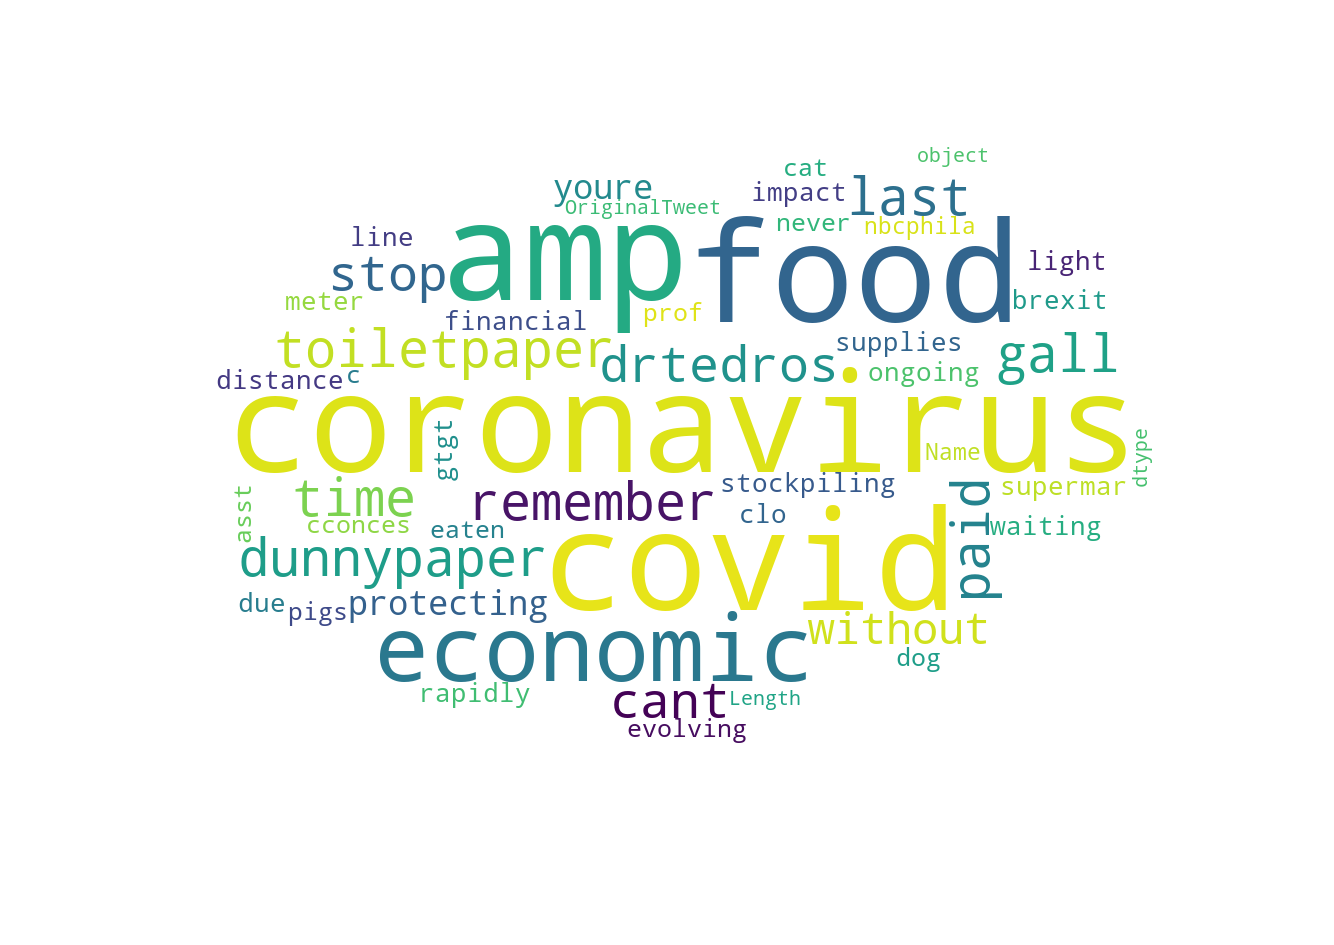

In [14]:
create_wordcloud(text1.OriginalTweet)

Word Cloud Saved Successfully


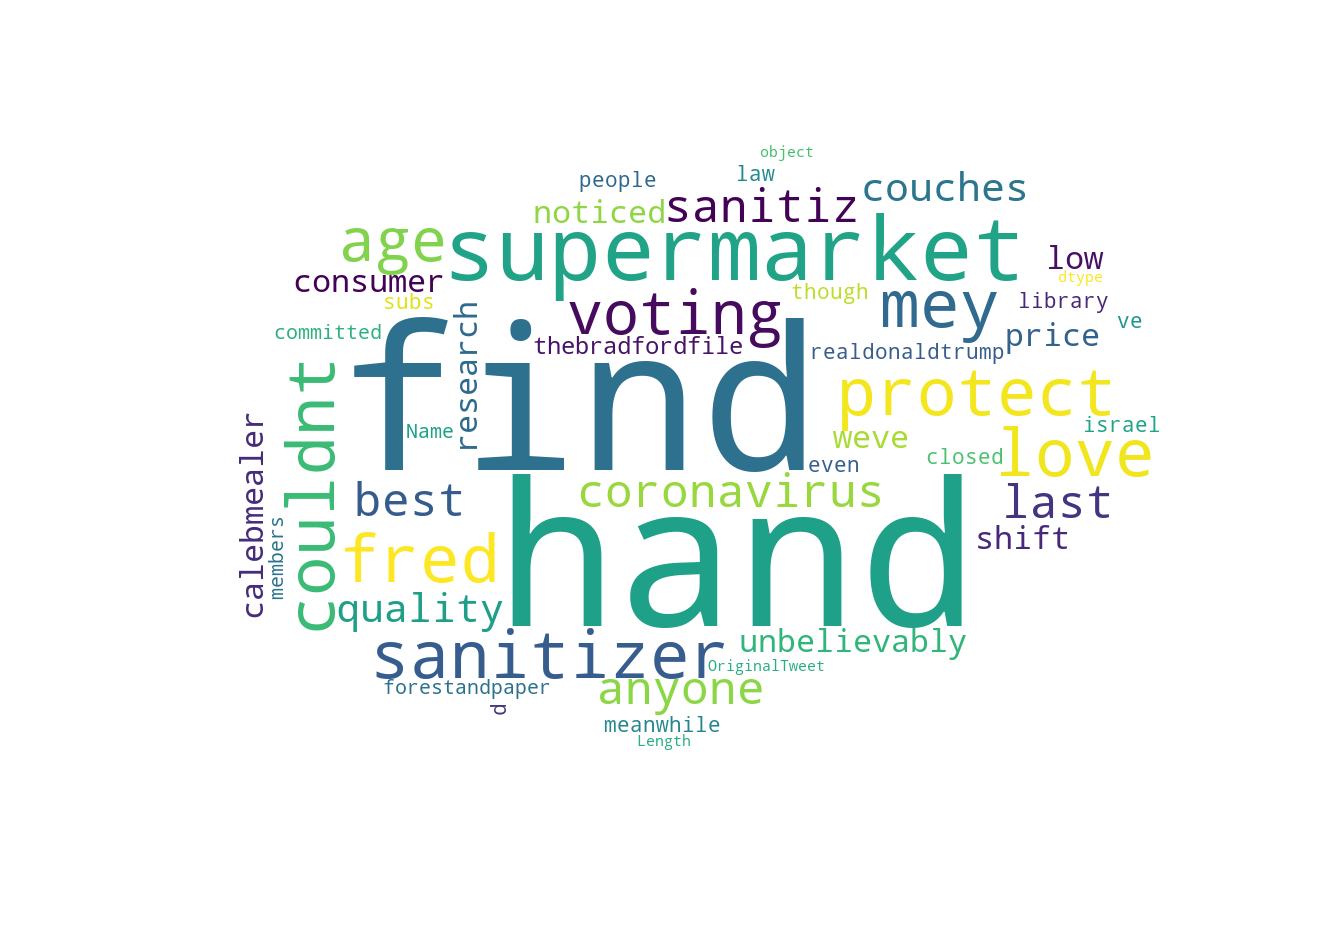

In [15]:
create_wordcloud(text2.OriginalTweet)

Word Cloud Saved Successfully


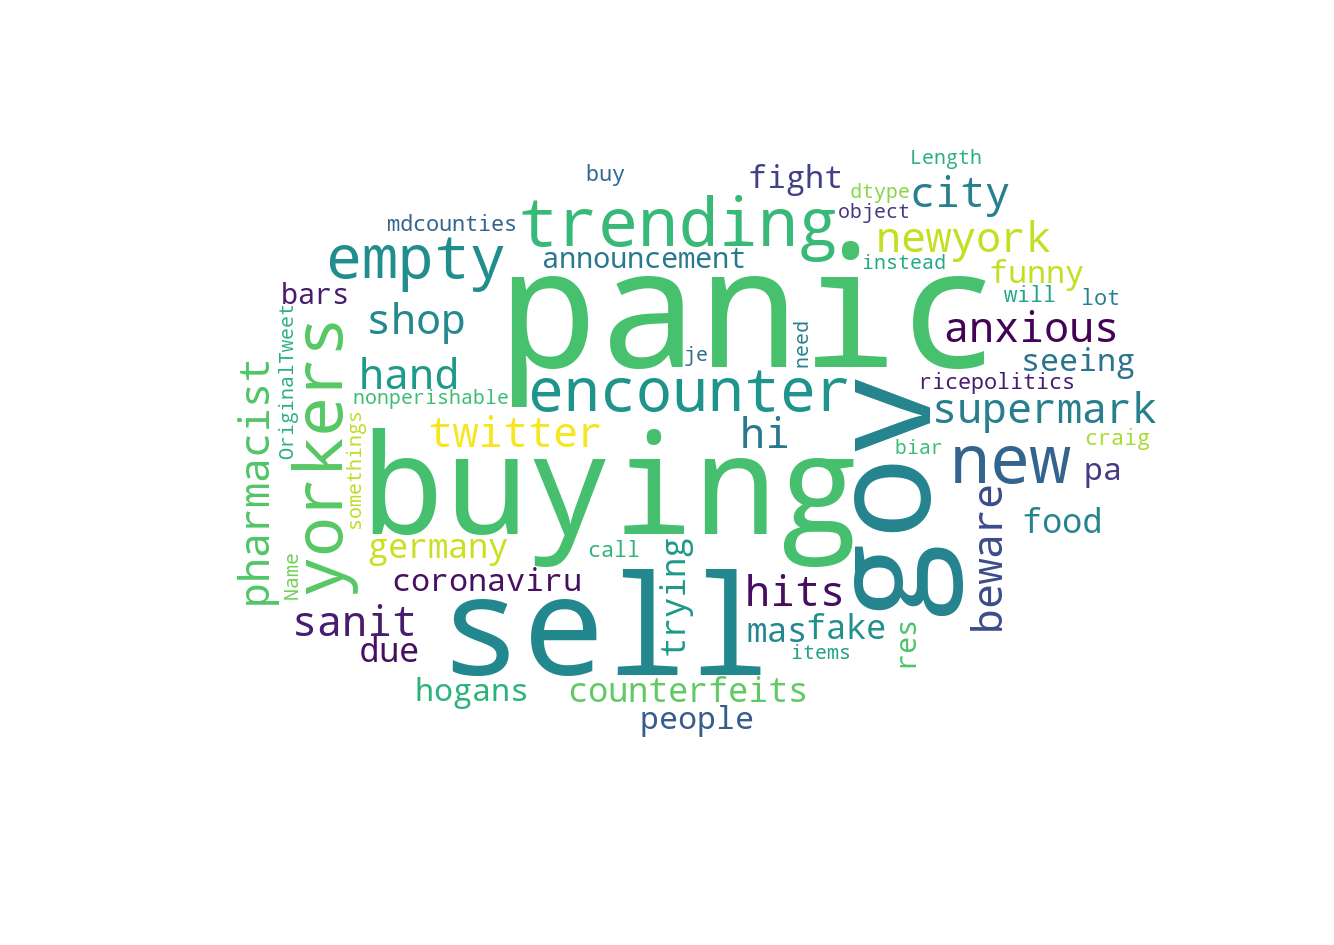

In [16]:
create_wordcloud(text3.OriginalTweet)

In [17]:
x = df.OriginalTweet
y = df.Sentiment

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

## Vectorizer

In [19]:
vec = CountVectorizer(stop_words="english")
x_train_vec = vec.fit_transform(x_train)
x_test_vec = vec.transform(x_test)

In [20]:
vec = CountVectorizer(stop_words="english")
x_train_vec = vec.fit_transform(x_train)
x_test_vec = vec.transform(x_test)

In [21]:
pd.DataFrame(x_train_vec.toarray(),columns=vec.get_feature_names())

,__,___,_andreiaaaa,_fc_nuernberg,_mealsonwheels,_need_,_shot_,aadya,aadyasitara,aapl,...,zombie,zombieapocalypse,zombies,zoo,zoom,zoom_us,zsl,zásobovány,zásoby,zástupce
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF

In [22]:
vec = CountVectorizer(stop_words='english')
x_train_vec = vec.fit_transform(x_train)
x_test_vec = vec.transform(x_test)
x_train_vec.shape

(2658, 10826)

In [23]:
lr=LogisticRegression()
pred_vec=lr.fit(x_train_vec,y_train).predict(x_test_vec)
accuracy=accuracy_score(y_test,pred_vec)
accuracy

0.41403508771929826

In [24]:
precision=precision_score(y_test,pred_vec,average='weighted')
precision

0.43745465275411843

In [25]:
f1=f1_score(y_test,pred_vec,average='weighted')
f1

0.41536361463223204

In [26]:
recall=recall_score(y_test,pred_vec,average='weighted')
recall

0.41403508771929826

In [27]:
confusion_matrix(y_test,pred_vec)

array([[ 67,   4,  76,  12,  25],
       [  9,  61,  27,   8,  87],
       [ 39,  13, 140,  42,  65],
       [  6,   2,  47,  94,  44],
       [ 10,  27,  88,  37, 110]], dtype=int64)

In [28]:
data = {"Method": ["accuracy","precision","f1","recall"],
       "Score": [accuracy,precision,f1,recall]}
df = pd.DataFrame(data=data)
df.sort_values(by=['Score'],ascending = False)

,Method,Score
1,precision,0.437455
2,f1,0.415364
0,accuracy,0.414035
3,recall,0.414035


## N-Gram

In [29]:
vec2=CountVectorizer(ngram_range=(1,2),stop_words='english',binary=True)
x_train_vec2=vec2.fit_transform(x_train)
x_test_vec2=vec2.transform(x_test)

In [30]:
lr=LogisticRegression()
pred_vec2=lr.fit(x_train_vec2,y_train).predict(x_test_vec2)
accuracy=accuracy_score(y_test,pred_vec)
accuracy

0.41403508771929826

In [31]:
precision=precision_score(y_test,pred_vec2,average='micro')
precision

0.393859649122807

In [32]:
f1=f1_score(y_test,pred_vec2,average='weighted')
f1

0.39139499996652577

In [33]:
recall=recall_score(y_test,pred_vec2,average='weighted')
recall

0.393859649122807

In [34]:
confusion_matrix(y_test,pred_vec2)

array([[ 53,   3,  89,  18,  21],
       [  4,  50,  29,  13,  96],
       [ 32,  10, 145,  46,  66],
       [  4,   1,  48,  92,  48],
       [  6,  21,  94,  42, 109]], dtype=int64)

In [35]:
data = {"Method": ["accuracy","precision","f1","recall"],
       "Score": [accuracy,precision,f1,recall]}
df = pd.DataFrame(data=data)
df.sort_values(by=['Score'],ascending = False)

,Method,Score
0,accuracy,0.414035
1,precision,0.393860
3,recall,0.393860
2,f1,0.391395
